# Desafio 6

## Pre Desarrollo

En este desafío validaremos nuestros conocimientos aprendidos de regresión lineal. Para lograrlo, necesitarás aplicar los modelos aprendidos en clase, utilizando de apoyo el archivo
fish.csv.
Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.
Tiempo asociado: 2 horas cronológicas 
Descripción
Este conjunto de datos es un registro de las ventas en el mercado de 7 especies comunes de peces diferentes. Con este conjunto de datos, se busca realizar un modelo predictivo
utilizando datos adecuados para máquinas y estimar el peso de los peces basándose en la longitud y ancho del pez.
El conjunto de datos incluye información sobre varias dimensiones del pez, que se utilizan para predecir su peso. Cada fila en el conjunto de datos representa una entrada de un pez
individual y contiene varias columnas con información relevante. Las dimensiones del pez y otros atributos en el conjunto de datos podrían incluir:
● Species: La especie del pez.
● Weight: El peso del pez, que es la variable que se intenta predecir.
● Length1, Length2, Length3: Diferentes longitudes del pez.
● Height: Altura del pez.
● Width: Ancho del pez.
Los datos en este archivo permiten realizar análisis estadísticos y modelado predictivo para determinar cómo las dimensiones del pez están relacionadas con su peso. Esto puede ser
útil en la industria pesquera y en la investigación científica para comprender mejor las relaciones entre las características físicas de los peces y su peso. Para esto se te solicita:
1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.
2. Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación entre el peso y longitudes de los peces, altura y ancho al añadir el volumen? Explica.
3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.
4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.
5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import missingno as msngo
import re

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
BASE_PATH = './Datos/'
INPUT_FINELAME = 'Fish.csv'
df = pd.read_csv(BASE_PATH+INPUT_FINELAME)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Desarrollo

### Pregunta 1
Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro.
<br>Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [19]:
df["volume"] = (np.pi * df["Height"] * df["Width"] * df['Length3'])/4
df["volume"]

0      1091.163093
1      1316.717905
2      1419.812737
3      1492.311687
4      1706.022149
          ...     
154      30.659299
155      32.695768
156      30.992205
157      70.895939
158      70.108631
Name: volume, Length: 159, dtype: float64

### Pregunta 2
Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación entre el peso y longitudes de los peces, altura y ancho al añadir el volumen? Explica.

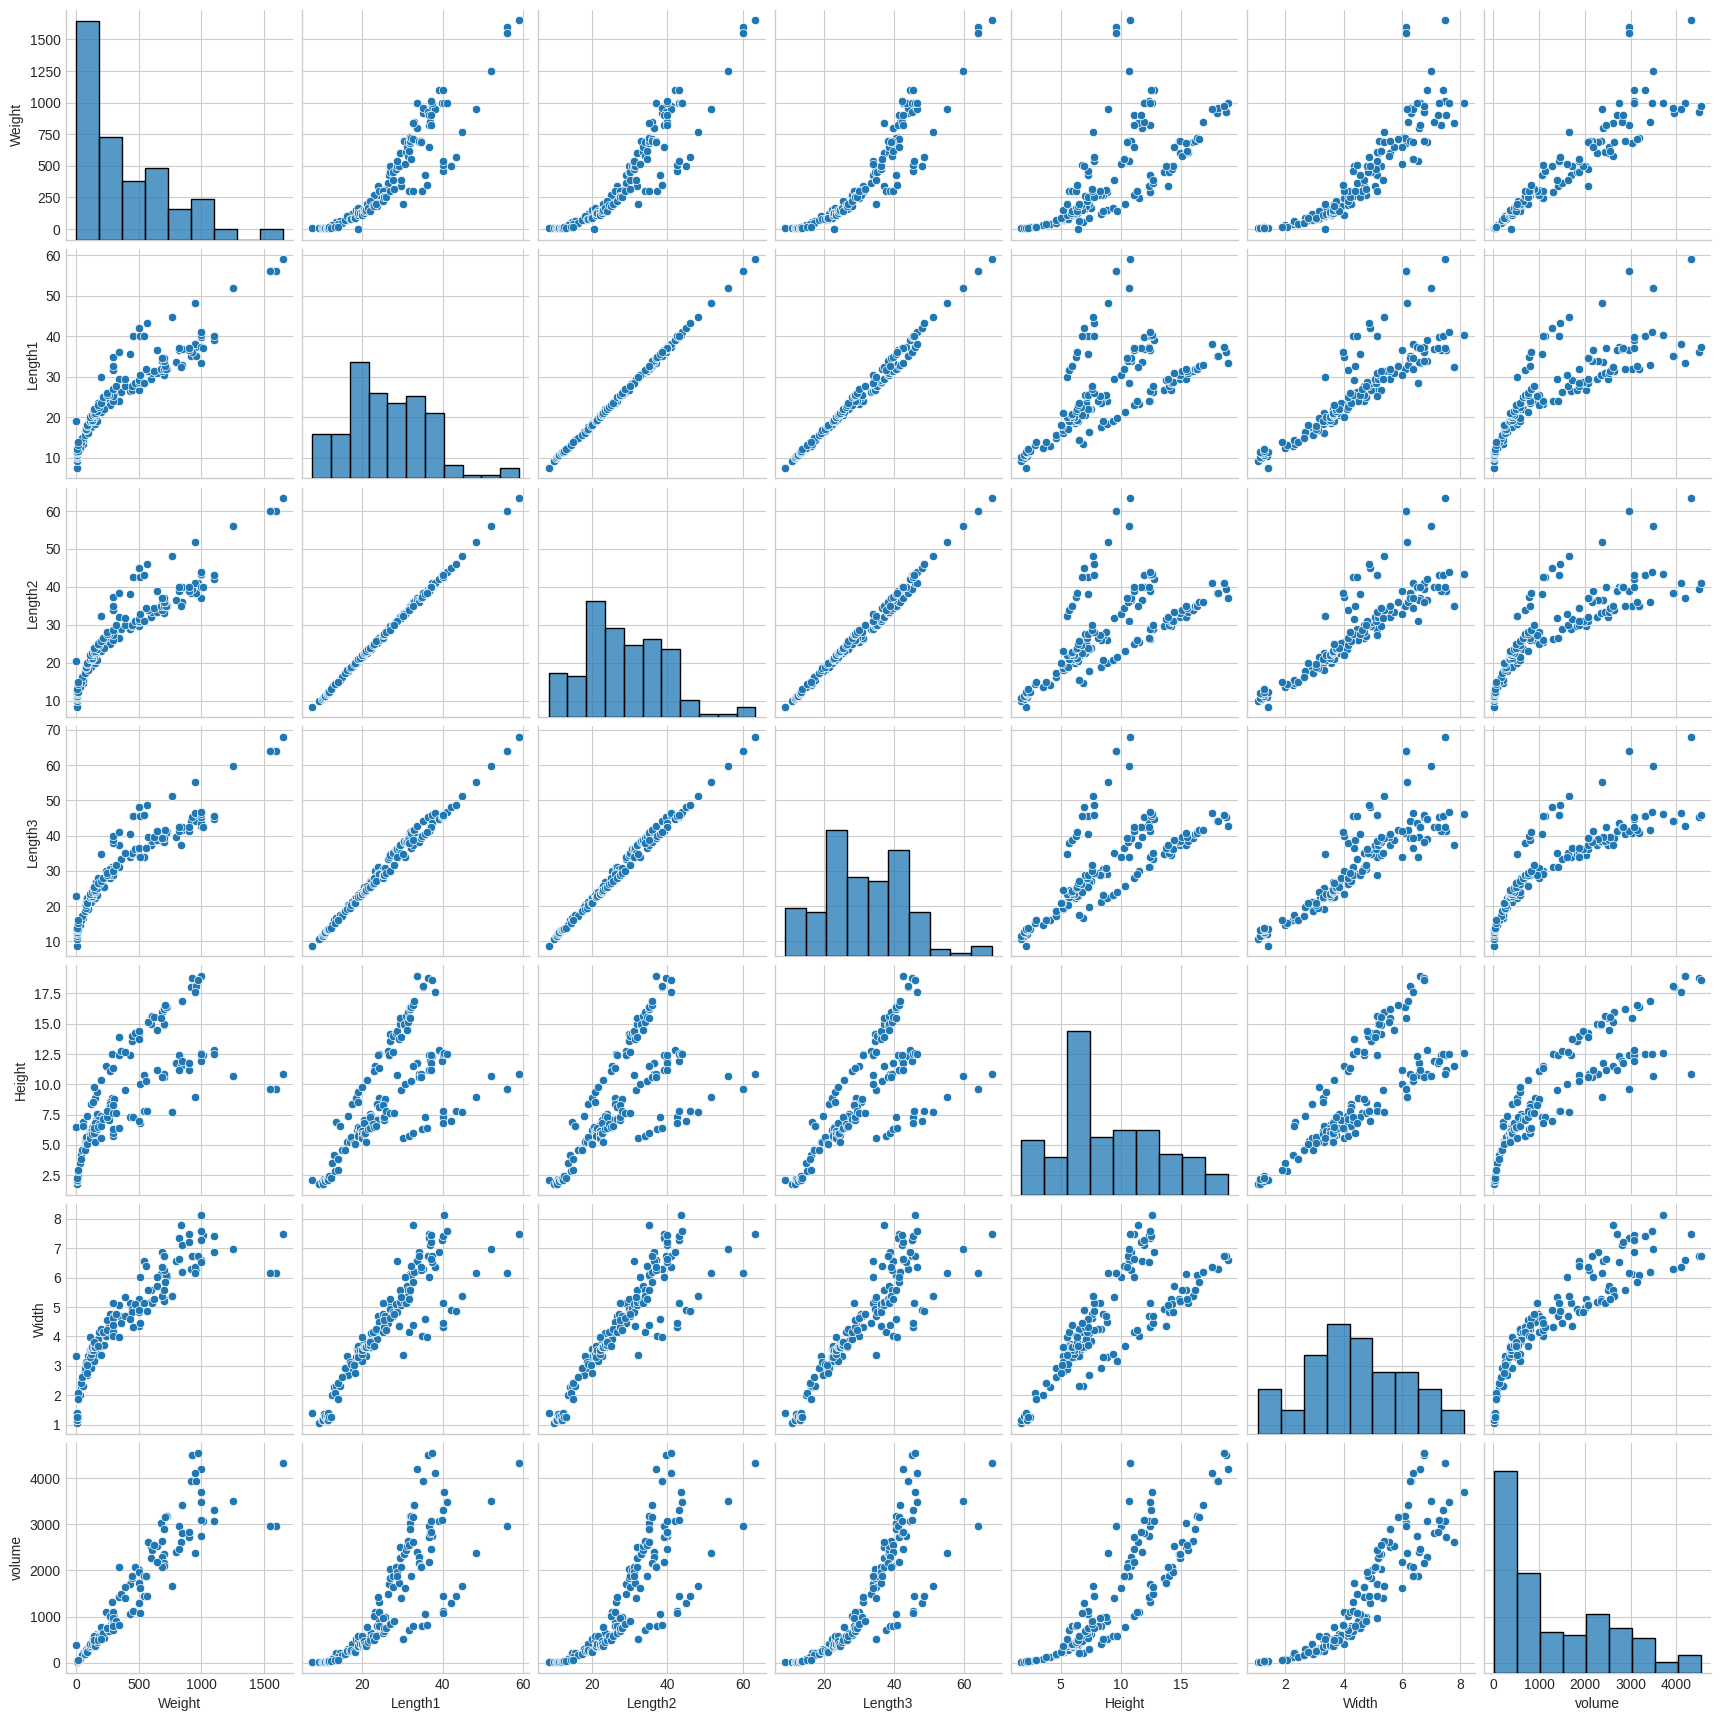

In [25]:
sns.pairplot(df)

<Axes: >

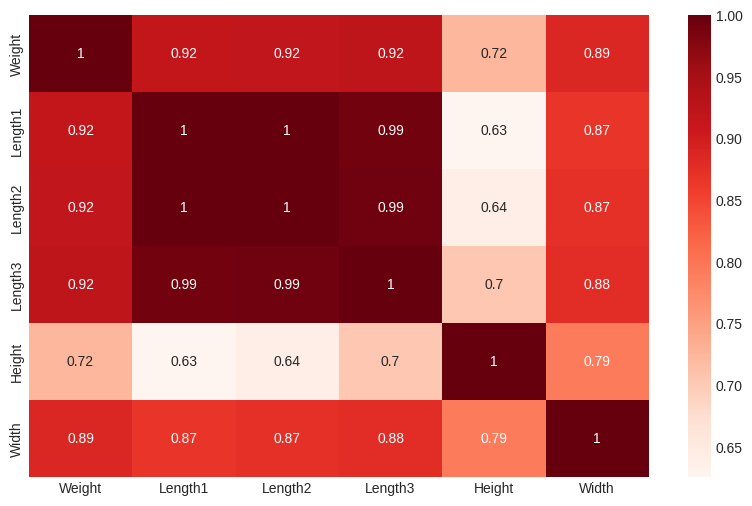

In [20]:
sns.heatmap(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].corr(), annot=True, cmap='Reds')

<Axes: >

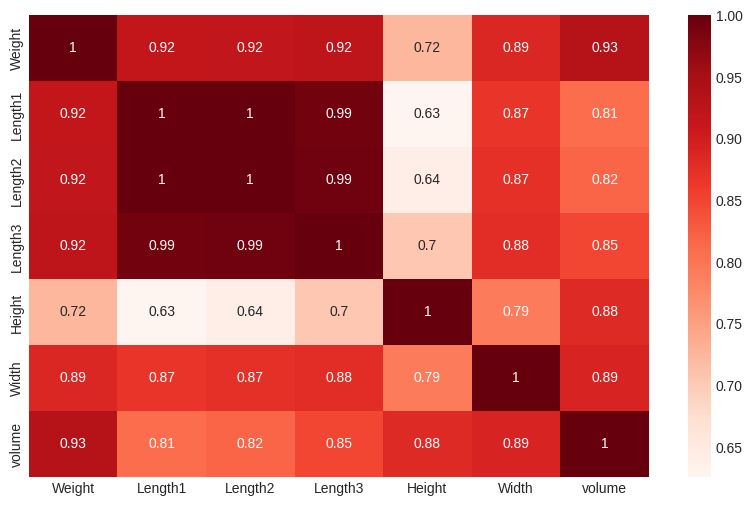

In [21]:
sns.heatmap(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width','volume']].corr(), annot=True, cmap='Reds')

We have than weight and volume have a great correlation

### Pregunta 3
Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

In [55]:
import statsmodels.api as sm
X = df['volume']
X = sm.add_constant(X)
y = df['Weight']
model = sm.OLS(y, X).fit() 
results = model.summary2()
print(results)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.868    
Dependent Variable: Weight           AIC:                2000.6857
Date:               2024-05-25 21:34 BIC:                2006.8235
No. Observations:   159              Log-Likelihood:     -998.34  
Df Model:           1                F-statistic:        1044.    
Df Residuals:       157              Prob (F-statistic): 2.92e-71 
R-squared:          0.869            Scale:              16858.   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      25.7257    15.4593    1.6641   0.0981   -4.8094   56.2608
volume      0.2783     0.0086   32.3124   0.0000    0.2613    0.2953
------------------------------------------------------------------
Omnibus:              105.705      Durbin-Watson:         0.410   
Pro

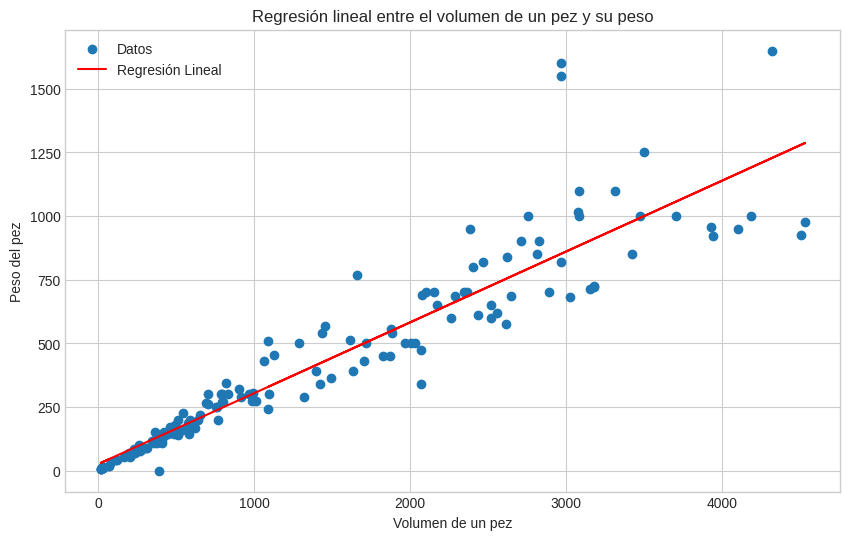

In [56]:
plt.scatter(df['volume'], y=df['Weight'], label="Datos")
plt.plot(df["volume"], model.predict(X), color='red', label="Regresión Lineal")
plt.title("Regresión lineal entre el volumen de un pez y su peso")
plt.xlabel("Volumen de un pez") 
plt.ylabel("Peso del pez")
plt.legend()
plt.show()

In [59]:
y.mean()

398.3264150943396

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,model.predict(X))

74.2704092837439

Tenemos un 0.86 de R^2 lo que significa que el modelo cubre la mayor parte de los resultados posibles en los datos de salida, adicional vemos que el error medio absoluto es de 74.27, que en comparacion con la media de 398.3 es un valor bajo, pero no despreciable.

### Pregunta 4
¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.

Deberia mejorar la prediccion ya que al ser de la misma especie, los datos deberian ser similares entre ellos, veamos un ejemplo

Iniciando con especie Parkki
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.990   
Dependent Variable: Weight           AIC:                78.1539 
Date:               2024-05-25 21:55 BIC:                78.9497 
No. Observations:   11               Log-Likelihood:     -37.077 
Df Model:           1                F-statistic:        1015.   
Df Residuals:       9                Prob (F-statistic): 1.45e-10
R-squared:          0.991            Scale:              60.586  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      5.3331     5.2468    1.0164   0.3360   -6.5360   17.2023
volume     0.2652     0.0083   31.8548   0.0000    0.2464    0.2840
-----------------------------------------------------------------
Omnibus:               1.175        Durbin-Watson:    

/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


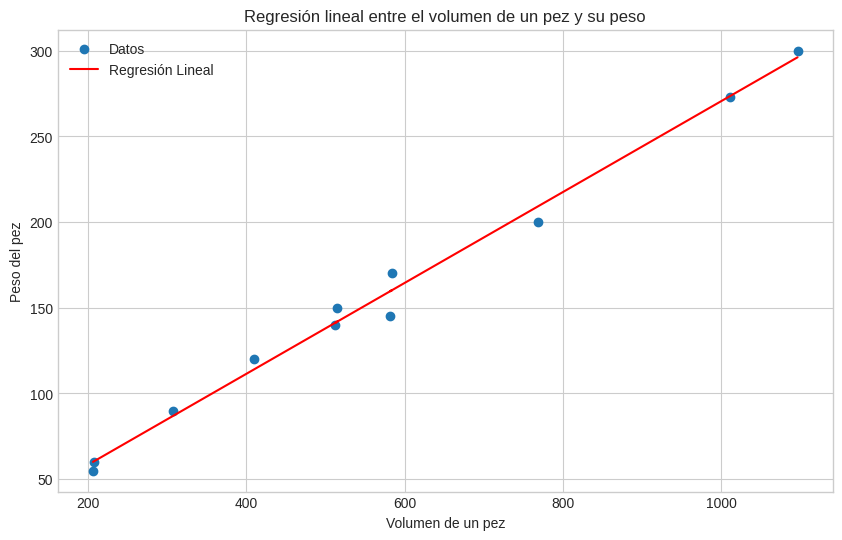

Iniciando con especie Smelt
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.943   
Dependent Variable: Weight           AIC:                41.2831 
Date:               2024-05-25 21:55 BIC:                42.5613 
No. Observations:   14               Log-Likelihood:     -18.642 
Df Model:           1                F-statistic:        214.5   
Df Residuals:       12               Prob (F-statistic): 5.10e-09
R-squared:          0.947            Scale:              0.97957 
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const        3.5209     0.5859    6.0091   0.0001   2.2443   4.7975
volume       0.2375     0.0162   14.6469   0.0000   0.2022   0.2728
-----------------------------------------------------------------
Omnibus:              4.498        Durbin-Watson:      

/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


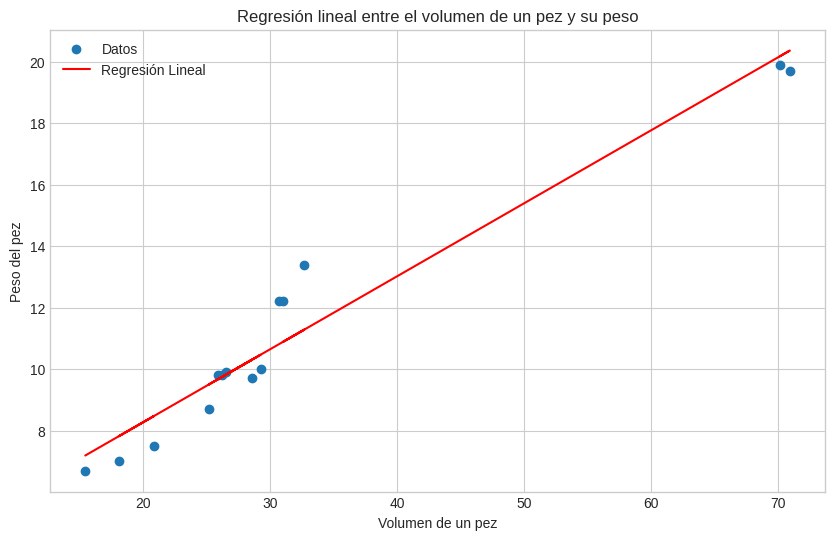

Iniciando con especie Perch
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.986   
Dependent Variable: Weight           AIC:                578.2164
Date:               2024-05-25 21:55 BIC:                582.2671
No. Observations:   56               Log-Likelihood:     -287.11 
Df Model:           1                F-statistic:        3801.   
Df Residuals:       54               Prob (F-statistic): 9.73e-52
R-squared:          0.986            Scale:              1723.9  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     15.5523     8.1337    1.9121   0.0612   -0.7548   31.8594
volume     0.3077     0.0050   61.6541   0.0000    0.2977    0.3177
-----------------------------------------------------------------
Omnibus:              16.989       Durbin-Watson:      

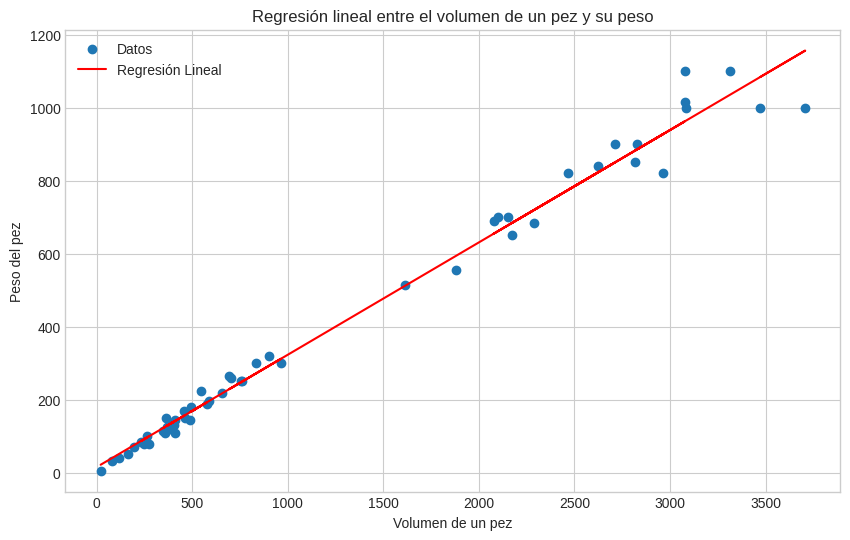

Iniciando con especie Pike
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.914   
Dependent Variable: Weight           AIC:                219.2656
Date:               2024-05-25 21:55 BIC:                220.9321
No. Observations:   17               Log-Likelihood:     -107.63 
Df Model:           1                F-statistic:        171.5   
Df Residuals:       15               Prob (F-statistic): 1.30e-09
R-squared:          0.920            Scale:              20952.  
------------------------------------------------------------------
            Coef.   Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const      -0.5931   65.1910  -0.0091  0.9929  -139.5445  138.3582
volume      0.4237    0.0324  13.0946  0.0000     0.3547    0.4927
-----------------------------------------------------------------
Omnibus:              8.066        Durbin-Watson:           2

/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


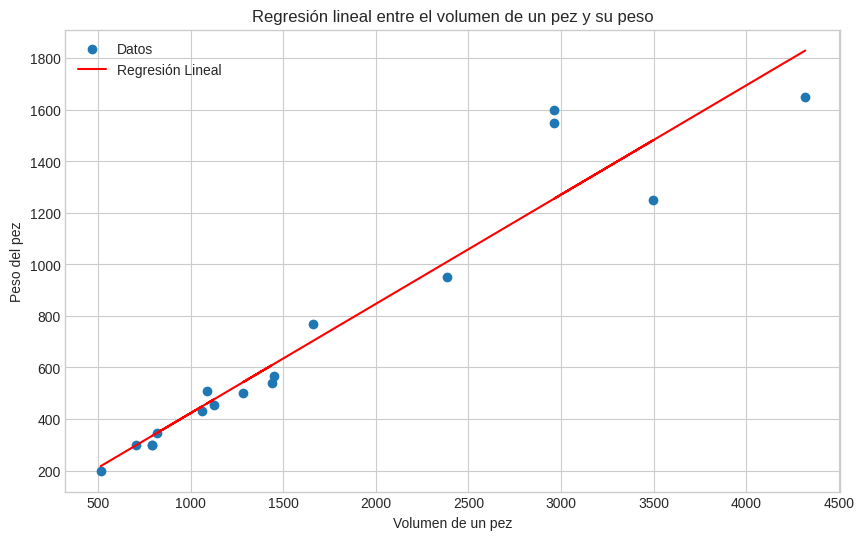

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Iniciando con especie Whitefish
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.965   
Dependent Variable: Weight           AIC:                67.2467 
Date:               2024-05-25 21:55 BIC:                66.8302 
No. Observations:   6                Log-Likelihood:     -31.623 
Df Model:           1                F-statistic:        140.2   
Df Residuals:       4                Prob (F-statistic): 0.000291
R-squared:          0.972            Scale:              3323.3  
------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
const     -38.2109   53.5218  -0.7139  0.5147  -186.8113  110.3896
volume      0.3545    0.0299  11.8413  0.0003     0.2714    0.4376
-----------------------------------------------------------------
Omnibus:               nan          Durbin-Watson:      

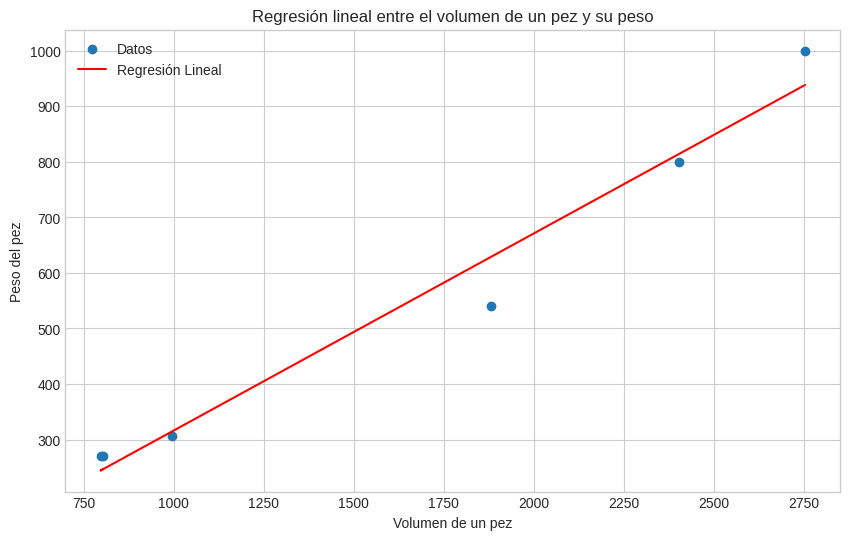

Iniciando con especie Bream
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.923   
Dependent Variable: Weight           AIC:                385.7377
Date:               2024-05-25 21:55 BIC:                388.8484
No. Observations:   35               Log-Likelihood:     -190.87 
Df Model:           1                F-statistic:        406.3   
Df Residuals:       33               Prob (F-statistic): 4.03e-20
R-squared:          0.925            Scale:              3387.2  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const     61.3336    29.3077    2.0927   0.0441   1.7067   120.9605
volume     0.2152     0.0107   20.1575   0.0000   0.1935     0.2369
-----------------------------------------------------------------
Omnibus:               3.897        Durbin-Watson:     

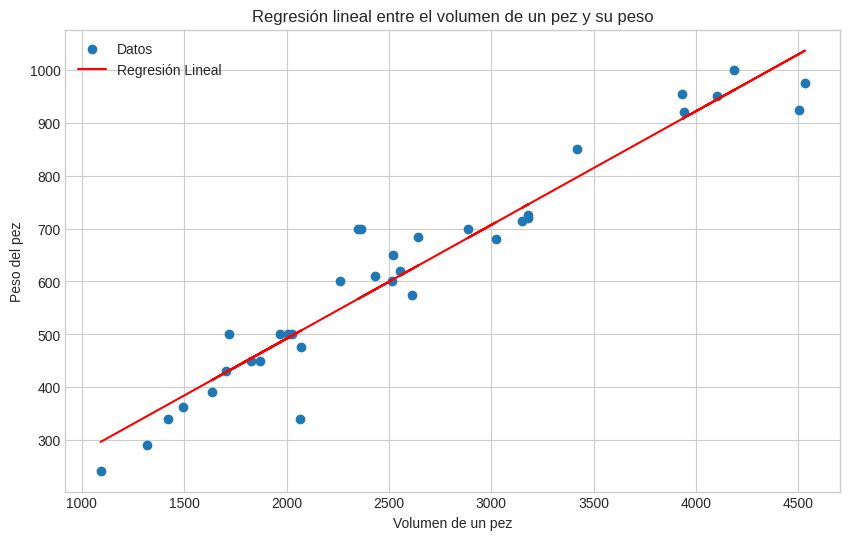

Iniciando con especie Roach
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.887   
Dependent Variable: Weight           AIC:                194.4444
Date:               2024-05-25 21:55 BIC:                196.4358
No. Observations:   20               Log-Likelihood:     -95.222 
Df Model:           1                F-statistic:        150.7   
Df Residuals:       18               Prob (F-statistic): 3.50e-10
R-squared:          0.893            Scale:              888.65  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const     1.4078    13.9646    0.1008   0.9208   -27.9308   30.7463
volume    0.2878     0.0234   12.2763   0.0000     0.2386    0.3371
-----------------------------------------------------------------
Omnibus:             39.135       Durbin-Watson:       

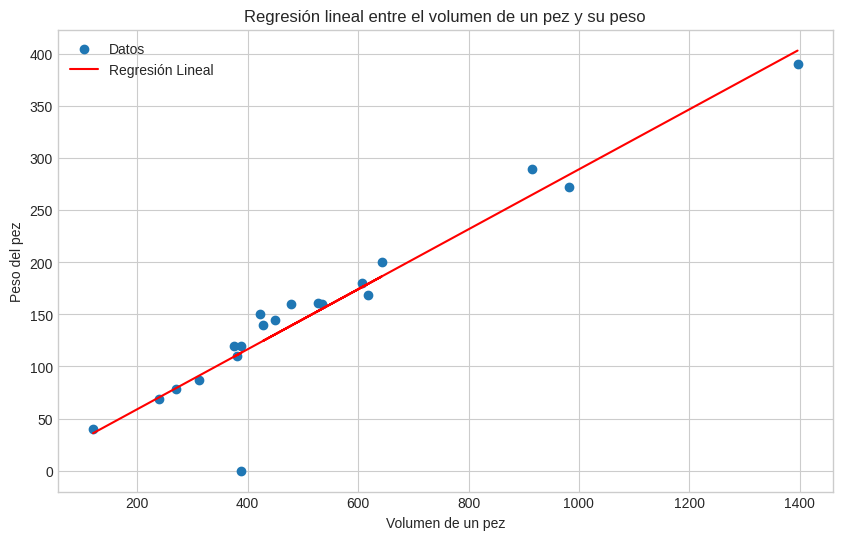

In [66]:
for el in set(df.Species):
    print(f"Iniciando con especie {el}")
    df_specie = df[df.Species == el]
    X = df_specie['volume']
    X = sm.add_constant(X)
    y = df_specie['Weight']
    model = sm.OLS(y, X).fit() 
    results = model.summary2()
    print(results)
    print(f"El error absoluto medio es {mean_absolute_error(y,model.predict(X))}")
    
    plt.scatter(df_specie['volume'], y=df_specie['Weight'], label="Datos")
    plt.plot(df_specie["volume"], model.predict(X), color='red', label="Regresión Lineal")
    plt.title("Regresión lineal entre el volumen de un pez y su peso")
    plt.xlabel("Volumen de un pez") 
    plt.ylabel("Peso del pez")
    plt.legend()
    plt.show()

Como es posible ver en los resultados, en al mayor parte de los casos el error absoluto medio disminuyo en gran medida, salvo en el caso de la especie "Pike" que alcanzo un error de 89.144

Igualmente es algo que se deberia evaluar con una mayor cantidad de datos

### Pregunta 5
Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.931    
Dependent Variable: Weight           AIC:                1899.7737
Date:               2024-05-25 22:18 BIC:                1908.9804
No. Observations:   159              Log-Likelihood:     -946.89  
Df Model:           2                F-statistic:        1062.    
Df Residuals:       156              Prob (F-statistic): 1.41e-91 
R-squared:          0.932            Scale:              8881.2   
-------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const    -268.2579   27.1023  -9.8980  0.0000  -321.7928  -214.7230
volume      0.1590    0.0118  13.4681  0.0000     0.1357     0.1823
Length3    14.5302    1.2193  11.9165  0.0000    12.1216    16.9387
------------------------------------------------------------------
Omnibus

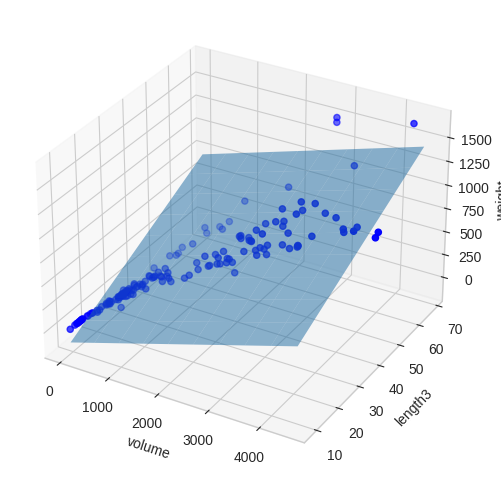

El error absoluto medio es en sk 64.71106250899815


In [86]:
X = df[['volume', 'Length3']]
X = sm.add_constant(X)
Y = df['Weight']
model = sm.OLS(Y, X).fit() 
results = model.summary2()
print(results)
print(f"El error absoluto medio es {mean_absolute_error(Y,model.predict(X))}")

X = df[['volume', 'Length3']]
Y = df['Weight']
modelo = LinearRegression()
modelo.fit(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['volume'], df['Length3'], df['Weight'], color='blue')


# Crear un meshgrid para el plano
x = np.linspace(df['volume'].min(), df['volume'].max(), num=10)
y = np.linspace(df['Length3'].min(), df['Length3'].max(), num=10)
x, y = np.meshgrid(x, y)

# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y

# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel('volume')
ax.set_ylabel('length3')
ax.set_zlabel("weight")
plt.show()

print(f"El error absoluto medio es en sk {mean_absolute_error(Y,modelo.predict(X))}")

Como podemos observar se tiene un error absoluto medio de 64.711, tomando en consideracion el caso anterior tenemos un menor error, lo que podriamos evaluar este modelo mejor que el anterior solo con una variable, y tambien tiene un R^2 de 0.93, cubriendo la mayor parte de los resultados posibles a obtener